In [1]:
import numpy as np
import scipy as ci 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML

import seaborn as sns 
import random
import tables 
import pickle
import warnings
warnings.filterwarnings('once')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.figure()
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 12})
plt.rc('axes', axisbelow=True)

<Figure size 432x288 with 0 Axes>

In [3]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/ana-sys-2-2-'
data_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/systematics/nugen_h5/'
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

# read MC

In [171]:
E_reco_cut = 0.2

In [189]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/nugen_h5/nugen_11374.h5','r') as f:
    n_file = 19017
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    CUT_prim_range = (np.log10(f.root.MCPrimary_new.cols.energy[:]) < 7)

    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality & CUT_prim_range
    
    
    chi2_red_numu_11374 = f.root.Collection.cols.chi2_red[:][CUT]
    stoch_numu_11374 = f.root.Collection.cols.stoch[:][CUT]
    chi2_red_new_numu_11374 = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_numu_11374 = f.root.Collection.cols.PeakOverMedian[:][CUT]

    zenith_numu_11374 = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_11374 = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_numu_11374 = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_numu_11374 = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_numu_11374 = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_11374 = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_11374 = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_11374 = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_11374 = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_numu_11374 = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_numu_11374 = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_numu_11374 = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_numu_11374 = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_numu_11374 = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    topocount_numu_11374 = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_numu_11374 = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]
    cv_ndoms_numu_11374 = f.root.CVMultiplicity.cols.n_hit_doms[:][CUT]
    cv_npulses_numu_11374 = f.root.CVMultiplicity.cols.n_pulses[:][CUT]
    closest_d_numu_11374 = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_numu_11374 = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_11374 = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_11374 = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_11374 = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_11374 = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_11374 = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_11374 = f.root.weight_honda2006[:][CUT] * lifetime/n_file 
    weight_prompt_numu_11374 = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    print(OneWeight)
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_11374 = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


[4.08072296e+17 1.34945119e+18 6.55643428e+18 ... 3.32811727e+17
 5.30864088e+19 5.32807242e+19]


In [190]:
with tables.open_file(data_dir+'nugen_21217.h5','r') as f:
    n_file = 21632
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    CUT_prim_range = (np.log10(f.root.MCPrimary_new.cols.energy[:]) > 4.5)&(np.log10(f.root.MCPrimary_new.cols.energy[:]) < 7)
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality & CUT_prim_range
    
    chi2_red_new_numu_spicenew = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_spicenew = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_spicenew = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_spicenew = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_spicenew = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_spicenew = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_spicenew = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_spicenew = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_spicenew = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_spicenew = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_spicenew = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_spicenew = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_spicenew = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_spicenew = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_spicenew = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_spicenew = f.root.weight_honda2006_h3a[:][CUT] * lifetime/n_file 
    weight_prompt_numu_spicenew = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    print(OneWeight)
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_spicenew = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


[2.42696978e+16 5.67295061e+16 1.46858527e+17 ... 8.71766663e+17
 3.19013649e+17 6.25304377e+17]


In [191]:
with tables.open_file(data_dir+'11883/nugen_11883_clsim-base-4.0.5.0.99_eff.h5','r') as f:
    n_file = 20000
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 18
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
    CUT_LdirC = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:] > 600
    CUT_balloon = f.root.Balloon.cols.InIceBalloonParameter[:] < 0.22
    CUT_multiplicity = f.root.TologicalCounterSplitCount.cols.value[:] == 1
    CUT_coincident = f.root.MCPrimary_coincident.cols.value[:] == 0 # buggy weight distribution for coincidents!! 
    CUT_reco_quality = np.abs((np.log10(f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]) - np.log10(f.root.MCPrimary_new.cols.energy[:]))/np.log10(f.root.MCPrimary_new.cols.energy[:])) < E_reco_cut   
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_LdirC & CUT_balloon & CUT_multiplicity & CUT_coincident & CUT_reco_quality
    
    chi2_red_new_numu_spicelea = f.root.Collection.cols.chi2_red_new[:][CUT]
    zenith_numu_spicelea = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_numu_spicelea = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    NPE_numu_spicelea = f.root.QTot.cols.value[:][CUT]
    Qtot_numu_spicelea = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_numu_spicelea = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_numu_spicelea = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_numu_spicelea = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    topocount_numu_spicelea = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    d_to_IC_center_numu_spicelea = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_numu_spicelea = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_numu_spicelea = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincidence_numu_spicelea = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_numu_spicelea = f.root.MCPrimary_new.cols.energy[:][CUT]
    zenith_truth_numu_spicelea = f.root.MCPrimary_new.cols.zenith[:][CUT]

    weight_conv_numu_spicelea = f.root.weight_honda2006[:][CUT] * lifetime/n_file 
    weight_prompt_numu_spicelea = f.root.weight_BERSS_H3p_central[:][CUT] * lifetime/n_file 

    ### astrophysical ###
    energy = f.root.MCPrimary_new.cols.energy[:][CUT]
    OneWeight = f.root.I3MCWeightDict.cols.OneWeight[:][CUT]
    print(OneWeight)
    NEvents = f.root.I3MCWeightDict.cols.NEvents[:][CUT]
    weight_astro_numu_spicelea = (6.7 * 10**(-18))/6 * (energy/10**5)**(-2) * OneWeight/(n_file * NEvents) * lifetime * 2  # 10**5: 100 TeV. 2 is nu+nubar
    

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


[1.75162435e+16 4.01356090e+14 1.30591396e+17 ... 3.96225261e+14
 6.86786326e+14 7.96727289e+15]


# compare SPICE3.2 to SPICELea

In [211]:
def sumw2(h,b,weight,quantity):
    w_2 = []
    for i in range(0,len(b)-1):
        all_weight_in_bin = weight[(b[i]<quantity)&(quantity<b[i+1])]
        w_2.append(np.sum(all_weight_in_bin**2))
    return w_2

def sig_x_over_y(x,y,sig_x,sig_y):
    return np.sqrt((1/y)**2 * sig_x**2 + (x/y**2)**2 * sig_y**2)

def comparison(var,weight,bins,varname,title):
    var_0 = var[0]
    var_1 = var[1]
    var_2 = var[2]
    
    weight_0 = weight[0]
    weight_1 = weight[1]
    weight_2 = weight[2]
    
    plt.figure(figsize=(7,7))

    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], wspace=0.0, hspace=0.1)
    ax1 = plt.subplot(gs[0])
    
    h_0,b_0,_ = plt.hist(var_0,bins=bins,log=True,weights=weight_0,histtype='step',label='11883',bottom=10**(-8),color='darkorange')
    h_1,b_1,_ = plt.hist(var_1,bins=bins,log=True,weights=weight_1,histtype='step',label='11374',bottom=10**(-8),color='dodgerblue')
    h_2,b_2,_ = plt.hist(var_2,bins=bins,log=True,weights=weight_2,histtype='step',label='21217',bottom=10**(-8),color='m')

    plt.ylabel('Events in 365 days')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(np.min(h_1)/2,)
    plt.legend(prop={'size': 11},loc='best')
    plt.title(title)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
    ax1.tick_params(labelbottom=False)    
    
    ax2 = plt.subplot(gs[1])
    
    
    # uncertainties
    err_0 = np.sqrt(sumw2(h_0,b_0,weight_0,var_0))
    err_1 = np.sqrt(sumw2(h_1,b_1,weight_1,var_1))
    err_2 = np.sqrt(sumw2(h_2,b_2,weight_2,var_2))
    yerr_10 = sig_x_over_y(h_1,h_0,err_1,err_0)
    yerr_20 = sig_x_over_y(h_2,h_0,err_2,err_0)

    # remove empty bins
    b = (b_0[1:] + b_0[:-1])/2
    cut_nozero = (h_0>0)
    h_0 = h_0[cut_nozero]
    h_1 = h_1[cut_nozero]
    h_2 = h_2[cut_nozero]
    b = b[cut_nozero]
    yerr_10 = yerr_10[cut_nozero]
    yerr_20 = yerr_20[cut_nozero]


    # plot
    plt.fill_between(b,h_1/h_0-yerr_10,h_1/h_0+yerr_10,color='dodgerblue',alpha=0.25,label='')
    plt.fill_between(b,h_2/h_0-yerr_20,h_2/h_0+yerr_20,color='purple',alpha=0.25,label='')
    
    plt.plot(b, h_1/h_0, '.-',color='dodgerblue')
    plt.plot(b, h_2/h_0, '.-',color='m')

    plt.axhline(1,ls='--',lw=1,color='black')
    plt.axhline(0.5,ls=':',lw=1,color='black')
    plt.axhline(1.5,ls=':',lw=1,color='black')

    plt.xlabel(varname)
    plt.ylabel('ratio to 11883')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(0.5,1.5)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    
#     plt.savefig(fig_dir+varname+'_dataMC.png',dpi=300)

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


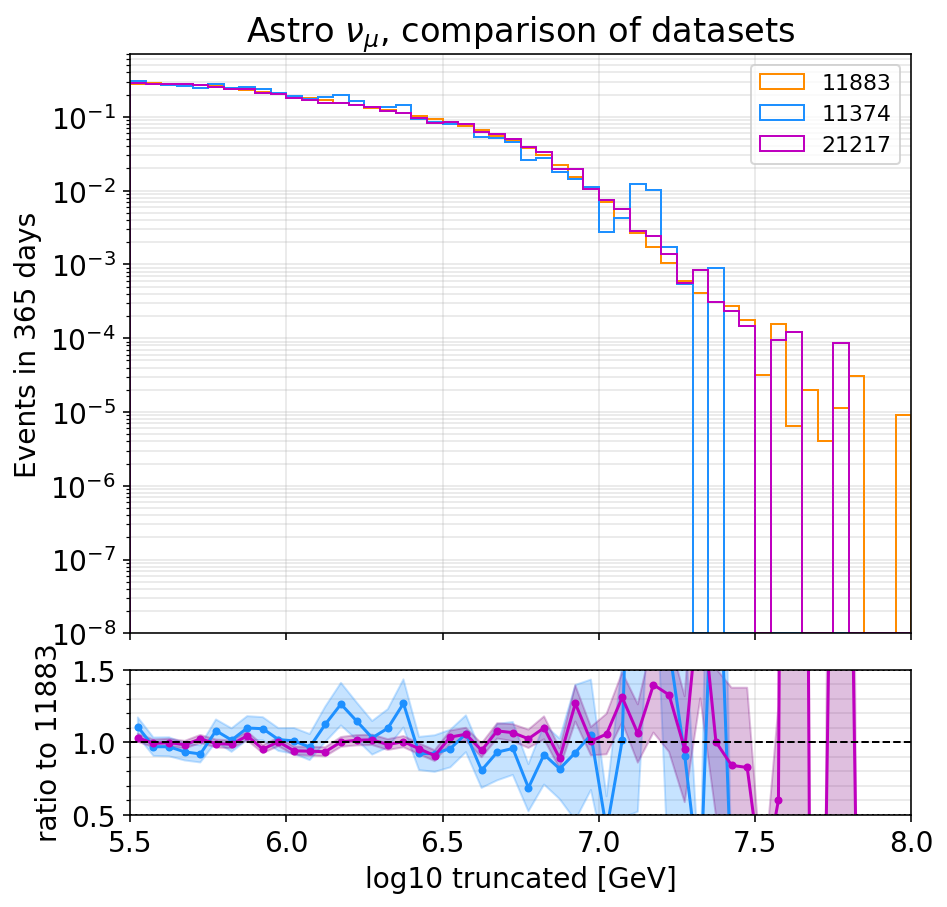

In [212]:
comparison([
            np.log10(truncated_muon_e_numu_spicelea),
            np.log10(truncated_muon_e_numu_11374),
            np.log10(truncated_muon_e_numu_spicenew),
           ],
           [
            weight_astro_numu_spicelea,
            weight_astro_numu_11374,
            weight_astro_numu_spicenew,
           ],
           np.linspace(5.5,8.,51),
           'log10 truncated [GeV]',
           r'Astro $\nu_\mu$, comparison of datasets'
          )

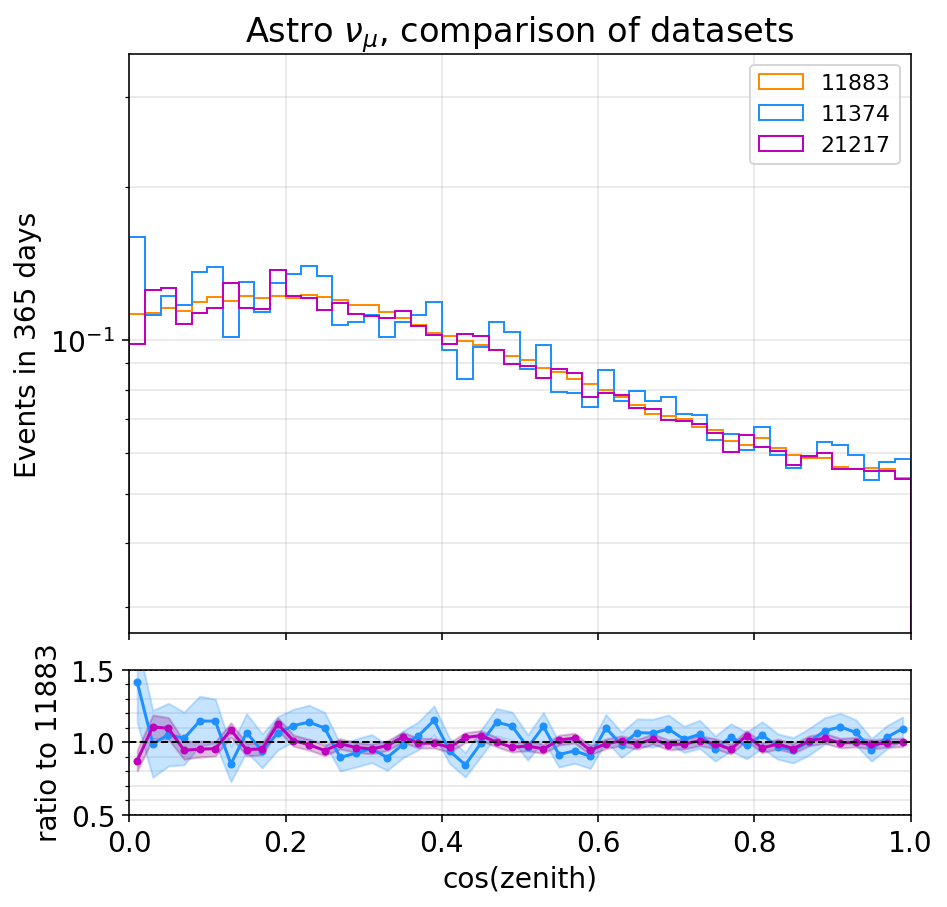

In [213]:
comparison([
            np.cos(zenith_numu_spicelea),
            np.cos(zenith_numu_11374),
            np.cos(zenith_numu_spicenew),
           ],
           [
            weight_astro_numu_spicelea,
            weight_astro_numu_11374,
            weight_astro_numu_spicenew,
           ],
           np.linspace(0,1,51),
           'cos(zenith)',
           r'Astro $\nu_\mu$, comparison of datasets'
          )

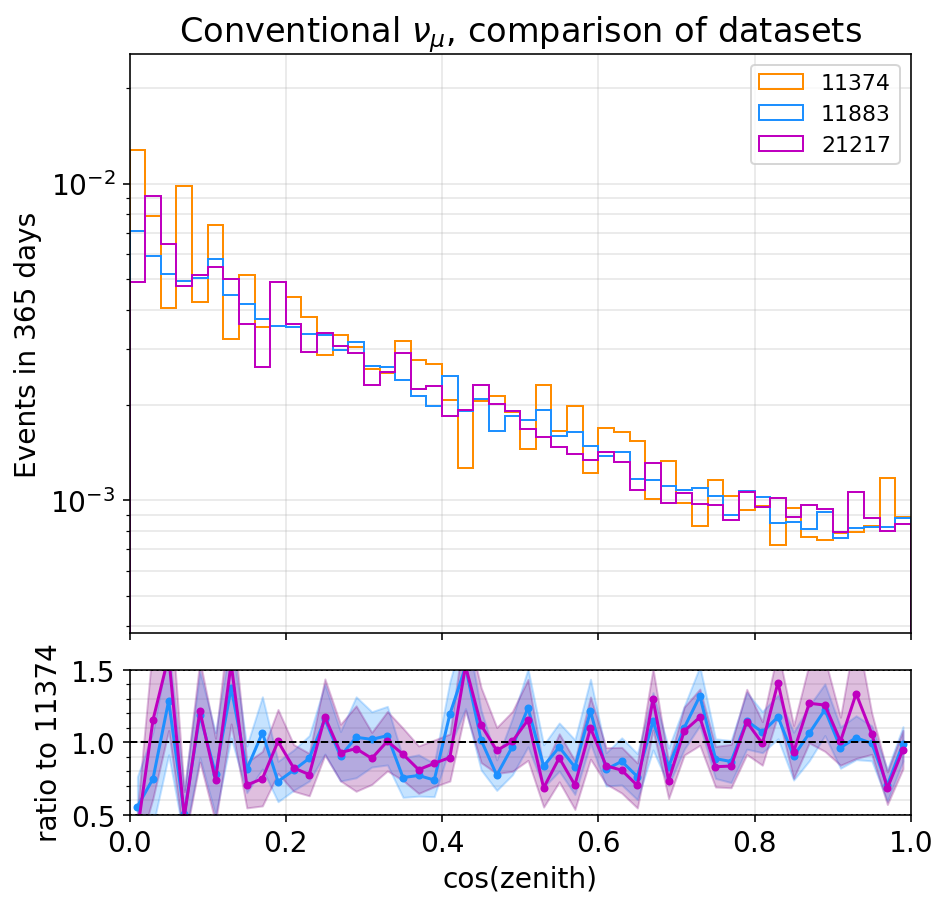

In [196]:
comparison([
            np.cos(zenith_numu_11374),
            np.cos(zenith_numu_spicelea),
            np.cos(zenith_numu_spicenew),
           ],
           [
            weight_conv_numu_11374,
            weight_conv_numu_spicelea,
            weight_conv_numu_spicenew,
           ],
           np.linspace(0,1,51),
           'cos(zenith)',
           r'Conventional $\nu_\mu$, comparison of datasets'
          )

In [203]:
print(np.sum(weight_astro_numu_11374))
print(np.sum(weight_astro_numu_spicelea))
print(np.sum(weight_astro_numu_spicenew))

4.668801377060455
4.5398920878437625
4.509448543223187


In [204]:
print(np.sum(weight_conv_numu_11374))
print(np.sum(weight_conv_numu_spicelea))
print(np.sum(weight_conv_numu_spicenew))

0.13290767410383475
0.11637949033151705
0.11778948967994579


In [205]:
print(np.sum(weight_prompt_numu_11374))
print(np.sum(weight_prompt_numu_spicelea))
print(np.sum(weight_prompt_numu_spicenew))

0.027404402183116253
0.026833588931371142
0.026952186935824827


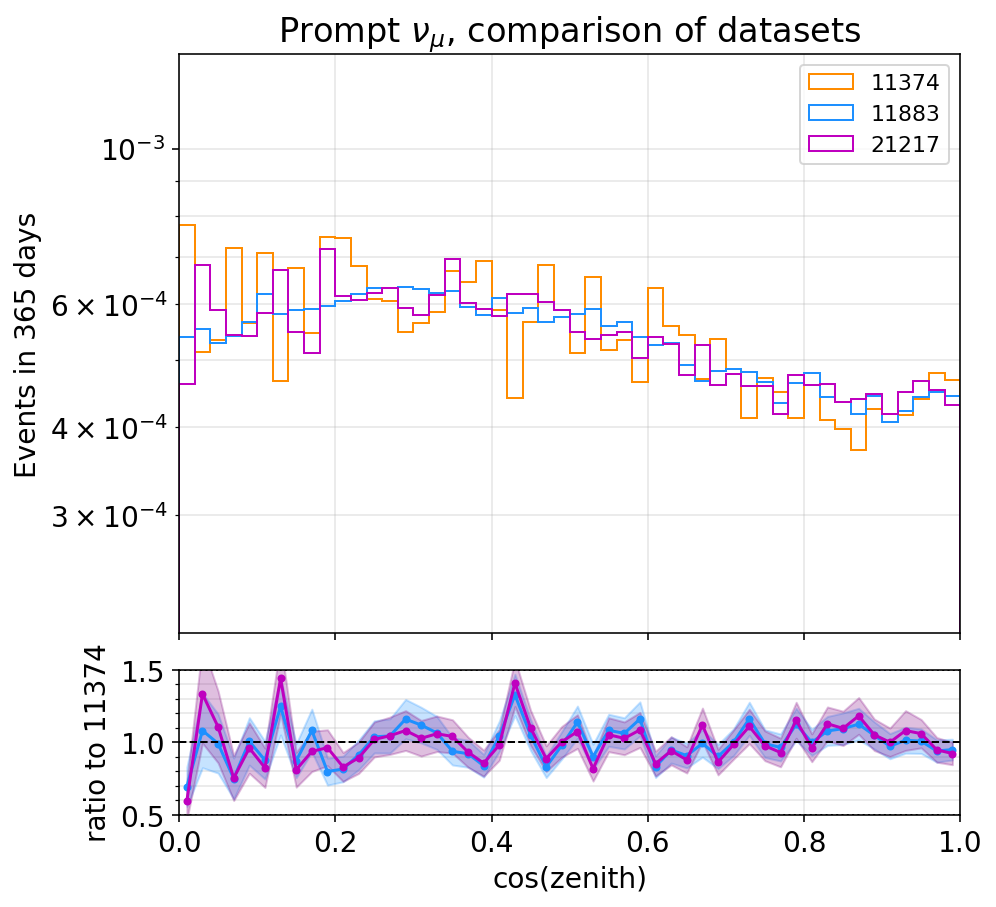

In [206]:
comparison([
            np.cos(zenith_numu_11374),
            np.cos(zenith_numu_spicelea),
            np.cos(zenith_numu_spicenew),
           ],
           [
            weight_prompt_numu_11374,
            weight_prompt_numu_spicelea,
            weight_prompt_numu_spicenew,
           ],
           np.linspace(0,1,51),
           'cos(zenith)',
           r'Prompt $\nu_\mu$, comparison of datasets'
          )

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


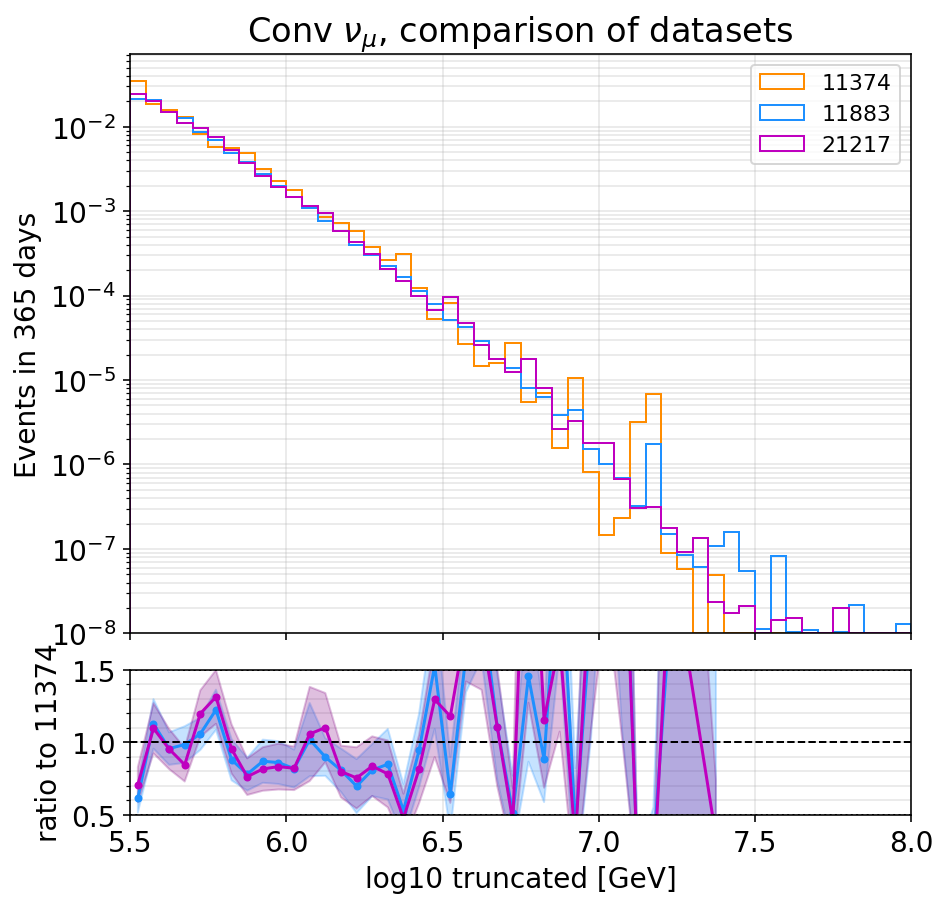

In [207]:
comparison([
            np.log10(truncated_muon_e_numu_11374),
            np.log10(truncated_muon_e_numu_spicelea),
            np.log10(truncated_muon_e_numu_spicenew),
           ],
           [
            weight_conv_numu_11374,
            weight_conv_numu_spicelea,
            weight_conv_numu_spicenew,
           ],
           np.linspace(5.5,8.,51),
           'log10 truncated [GeV]',
           r'Conv $\nu_\mu$, comparison of datasets'
          )

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


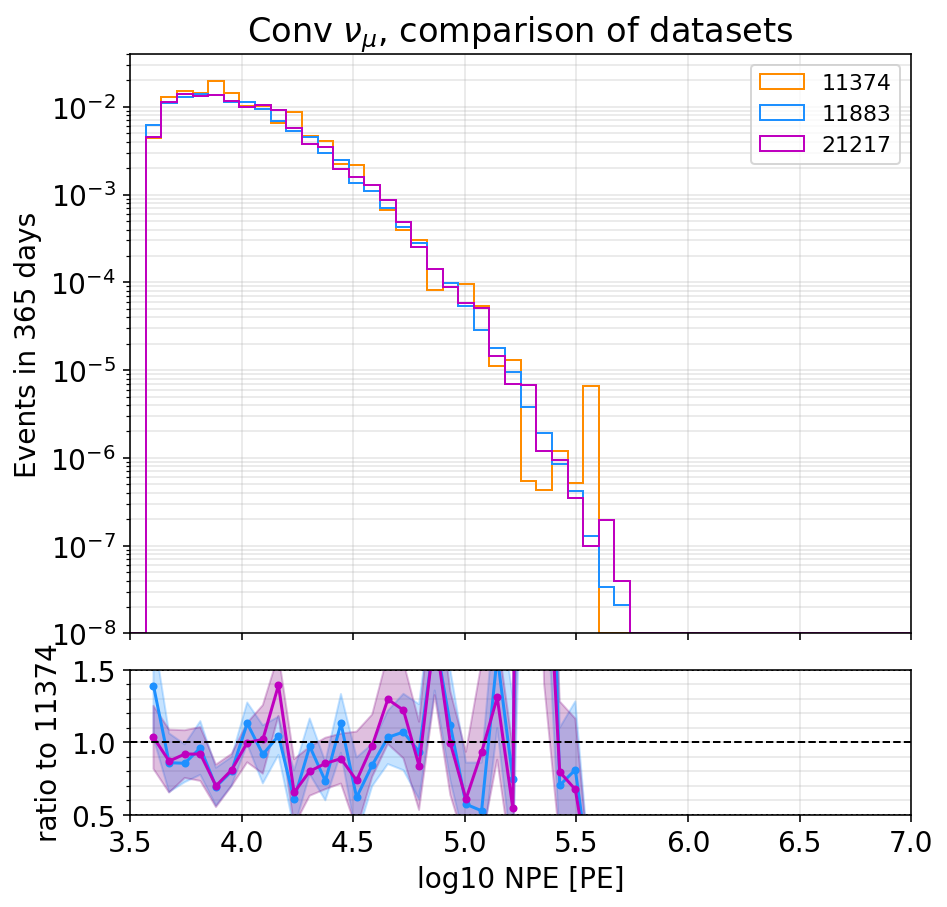

In [208]:
comparison([
            np.log10(NPE_numu_11374),
            np.log10(NPE_numu_spicelea),
            np.log10(NPE_numu_spicenew),
           ],
           [
            weight_conv_numu_11374,
            weight_conv_numu_spicelea,
            weight_conv_numu_spicenew,
           ],
           np.linspace(3.5,7.,51),
           'log10 NPE [PE]',
           r'Conv $\nu_\mu$, comparison of datasets'
          )

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


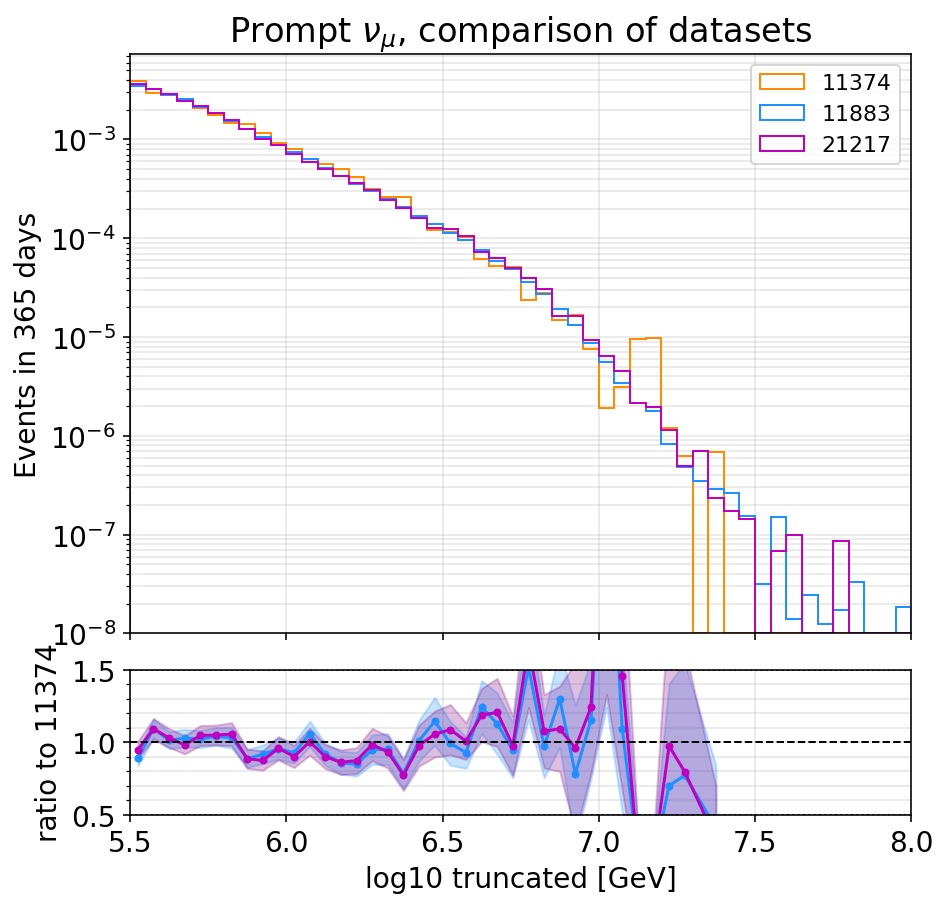

In [209]:
comparison([
            np.log10(truncated_muon_e_numu_11374),
            np.log10(truncated_muon_e_numu_spicelea),
            np.log10(truncated_muon_e_numu_spicenew),
           ],
           [
            weight_prompt_numu_11374,
            weight_prompt_numu_spicelea,
            weight_prompt_numu_spicenew,
           ],
           np.linspace(5.5,8.,51),
           'log10 truncated [GeV]',
           r'Prompt $\nu_\mu$, comparison of datasets'
          )

In [170]:
np.sum(weight_astro_numu_spicenew)

5.791732804118761

In [22]:
np.sum(weight_astro_numu_spicelea)

4.5398920878437625

In [23]:
4.5398920878437625/4.197385436246083

1.0815999999999997

In [31]:
weight_conv_numu_spicelea/weight_conv_numu_spicenew

array([1.0816, 1.0816, 1.0816, ..., 1.0816, 1.0816, 1.0816])

In [36]:
print(np.cos(zenith_numu_spicelea))
print(np.cos(zenith_numu_spicenew))

[0.916974   0.95722896 0.08714758 ... 0.50059493 0.80678451 0.18880104]
[0.916974   0.95722896 0.08714758 ... 0.50059493 0.80678451 0.18880104]
